In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
#create known parameter
weight = 0.7
bias =0.3
# create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]




(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
#lets split our synthetic dataset
train_split = int(0.8*len(X))
print(train_split)
X_train, y_train  =  X[:train_split], y[:train_split]
X_test , y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)
# print(X[12:])

40


(40, 40, 10, 10)

In [4]:
## Lets define our function for the plot
def plot_predictions(train_data = X_train, train_labels = y_train,
                    test_data = X_test, test_labels = y_test,
                    predictions = None):
    
    
    plt.figure(figsize=(10,7))
    
    ##training data
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    ## test data
    plt.scatter(test_data, test_labels, c ="g", s =4, label="Testing data")
    
    
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")
        
    
    plt.legend(prop={"size":14})
    
    
    
    

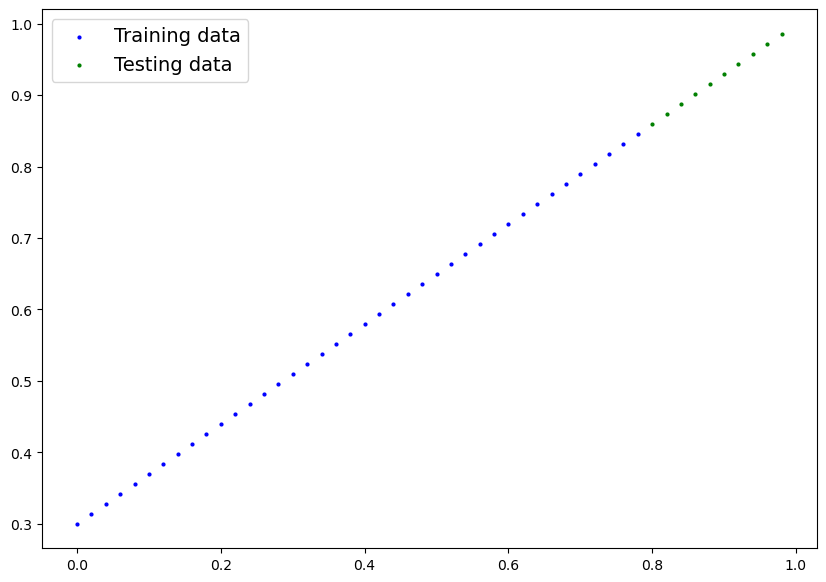

In [5]:
plot_predictions()

In [6]:
#lets create our linear regression model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.weights = nn.Parameter(torch.randn(1,
                                               dtype=torch.float),
                                   requires_grad=True)
        
        self.bias = nn.Parameter(torch.randn(1,
                                            dtype=torch.float),
                                requires_grad=True)
        
        
    
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias
    

In [7]:
## Lets enable reproducability
torch.manual_seed(42)

## Lets instantiate an object of our constructed class
model_0 = LinearRegressionModel()

## Lets check all the parameters of our model
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
with torch.inference_mode(): ##  I believe grad is turned off here
    y_preds = model_0(X_test)

In [10]:
print(y_preds)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


In [11]:
## Lets check the predictions

print(len(X_test))
print(len(y_preds))
print(y_preds)

10
10
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


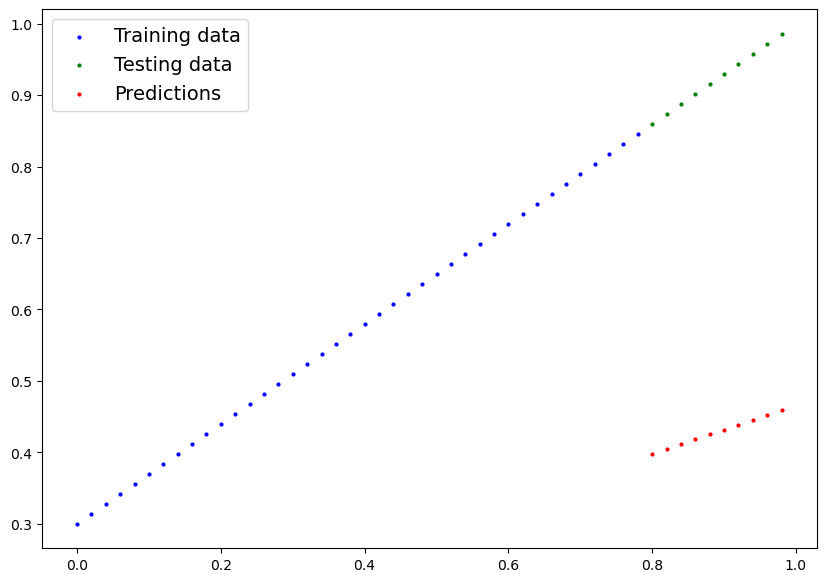

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
## So what would be the difference
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [14]:
##lets get the training started
## we need a loss function and an optimizer
## loss function -->> MAE for Regression BCE for Classification
## torch.nn.L1Loss() for our purpose
##  torch.optim.SGD(params, lr)
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr = 0.005)


In [15]:
## steps for training
## forward_pass -> calculate_loss -> set_gradient_to_Zero -> compute_grad_backprop ->
## update_optimizer

## steps for Testing
## forward_pass -> cal_loss -> cla_eval_metrics

torch.manual_seed(42)


epochs = 2000

## Record_keeping
train_loss_values = []
test_loss_values = []
epoch_count = []


for epoch in range(epochs):
    
    ## training begining
    model_0.train()
    
    ## Forward_pass
    y_pred = model_0(X_train)
    
    ## calculate Loss
    
    loss = loss_fn(y_pred, y_train)
    
    
    ## set grad to Zero
    optimizer.zero_grad()
    
    
    ## backprop after grad calc
    loss.backward()
    
    
    ## update optimizer
    optimizer.step()
    
    
    ## Testing
    
    ## put model in eval_mode
    model_0.eval()
    
    with torch.inference_mode():
        
        ## Forward Pass
        test_pred = model_0(X_test)
        
        ## calc loss on Test data(comparison on data of same type)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))
        
        ## print / Check 
        
        if epoch%100==0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(loss.detach().numpy())
            
            print(f"Epoch: {epoch}|| Train_loss: {loss} || Test_loss: {test_loss}")
        
        
















Epoch: 0|| Train_loss: 0.31288138031959534 || Test_loss: 0.4878006875514984
Epoch: 100|| Train_loss: 0.041651852428913116 || Test_loss: 0.10024197399616241
Epoch: 200|| Train_loss: 0.024415848776698112 || Test_loss: 0.056821130216121674
Epoch: 300|| Train_loss: 0.007245116867125034 || Test_loss: 0.016491109505295753
Epoch: 400|| Train_loss: 0.001977377338334918 || Test_loss: 0.0024690269492566586
Epoch: 500|| Train_loss: 0.001977377338334918 || Test_loss: 0.0024690269492566586
Epoch: 600|| Train_loss: 0.001977377338334918 || Test_loss: 0.0024690269492566586
Epoch: 700|| Train_loss: 0.001977377338334918 || Test_loss: 0.0024690269492566586
Epoch: 800|| Train_loss: 0.001977377338334918 || Test_loss: 0.0024690269492566586
Epoch: 900|| Train_loss: 0.001977377338334918 || Test_loss: 0.0024690269492566586
Epoch: 1000|| Train_loss: 0.001977377338334918 || Test_loss: 0.0024690269492566586
Epoch: 1100|| Train_loss: 0.001977377338334918 || Test_loss: 0.0024690269492566586
Epoch: 1200|| Train_loss

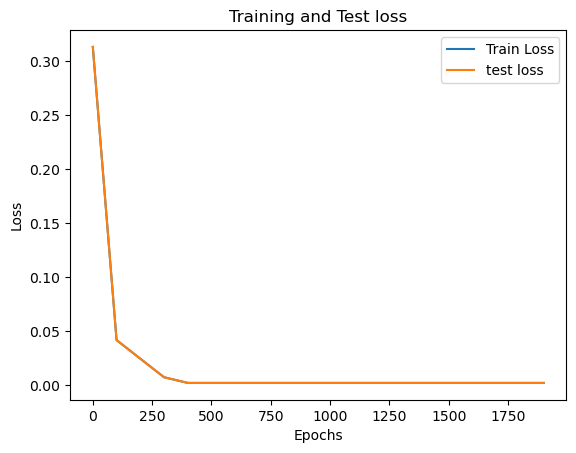

In [16]:
## lets check the progress graphically
plt.plot(epoch_count, train_loss_values, label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="test loss")
plt.title("Training and Test loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [17]:
## lower the loss better the accuracy
## lets see what our model learned
print("weightandbias: ")
print(model_0.state_dict())
print(weight, bias)


weightandbias: 
OrderedDict([('weights', tensor([0.6954])), ('bias', tensor([0.2998]))])
0.7 0.3


In [18]:
## lets check the model's predictions
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds


tensor([[0.8561],
        [0.8701],
        [0.8840],
        [0.8979],
        [0.9118],
        [0.9257],
        [0.9396],
        [0.9535],
        [0.9674],
        [0.9813]])

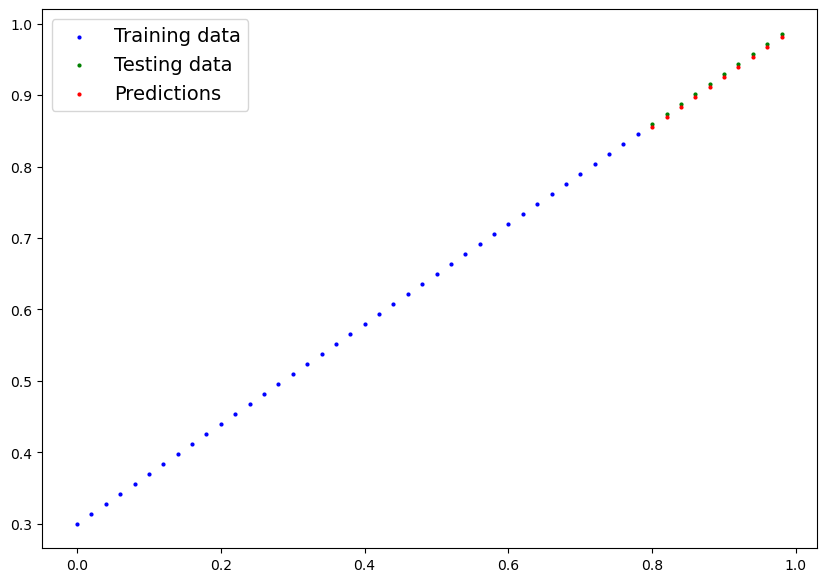

In [19]:
## lets see the predictions in plotted graphs
plot_predictions(predictions=y_preds)


**Looks like we are getting there**

In [20]:
## Lets learn to save and load the model
## official and recommended way is to save and load state_dict()
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "pytorch_02.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving.. : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f = MODEL_SAVE_PATH)


Saving.. : models/pytorch_02.pth


In [21]:
## and now load the model...
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [22]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [23]:
# Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [24]:
## ok thats it for the part A
## lets look forward in part B